In [1]:
!nvidia-smi

Thu Apr 16 23:07:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    Off  | 00000000:04:00.0 Off |                  N/A |
| 18%   33C    P0    56W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN X (Pascal)    Off  | 00000000:05:00.0 Off |                  N/A |
| 19%   36C    P0    55W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'
print('This programme is using GPU 2, 3')

This programme is using GPU 2, 3


In [3]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR

import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
import sys
sys.path.append('../')

from utils.ImageDisplay import show_some, imshow
from utils.ModelSummary import summarize
from utils.storage import save_trained, load_trained
from utils.dataset import DifferentTargetSceneDataset

In [5]:
locs = ["scene_abandonned_city_54"]
train_dataset = DifferentTargetSceneDataset( locations = locs,
                                             data_path = '../../VIDIT/train/',
                                             input_colors = ["4500"],
                                             target_colors = ["4500"],
                                             transform = transforms.Resize(128)
                                             )
#test_dataset = ImageDataset( dataPath = '../../../VIDIT/validate/',
#                             transform = transforms.Resize(128))
train_dataloader = DataLoader(train_dataset, batch_size=70, shuffle=True, num_workers=8)
#test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=True, num_workers=8)

100%|██████████| 432/432 [00:00<00:00, 1148.34it/s]


In [17]:
from models.anOtherSwapNet import SwapModel
model = SwapModel().cuda()
model.init_weights()
#model.load_state_dict(torch.load('./OneImageDispNet_SouthEast2SouthWithDataLoader.pth'))
distance = nn.MSELoss().cuda() #We can modify this, eg input and output must have same edges, we should experiment differents ones
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5) #Weight Decay is L2 Regularization
#scheduler = MultiStepLR(optimizer, milestones=[3000,8000,13000,18000], gamma=0.1) #divide learning rate by 10 at each milestone

In [7]:
#defining some params
num_epochs = 10 #you can go for more epochs
loss_history1 = []
loss_history5 = []


------------- training --------------- epoch: 1
input (90°, 4500K)


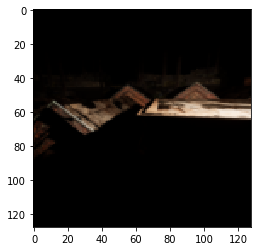

target (225°, 4500K)


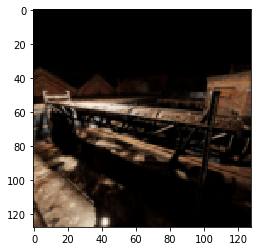

prediction input 360.0°, 4500.0K
prediction target 360.0°, 4500.0K
prediction gt 360.0°, 4500.0K
prediction gt


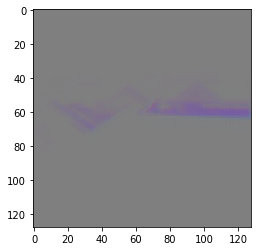

groundtruth (225°, 4500K)


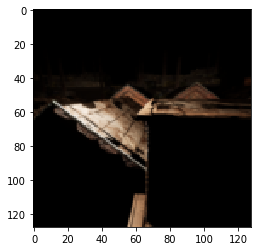

epoch [1/10], batch [1/2617], losses:0.1676, 0.0000, 0.0003, 0.0000, 0.9937, score:0.3077
epoch [1/10], batch [11/2617], losses:0.1696, 0.0000, 0.0000, 0.0345, 1.0637, score:0.2506
epoch [1/10], batch [21/2617], losses:0.1655, 0.0000, 0.0044, 1949.6686, 1.0535, score:0.3390
epoch [1/10], batch [31/2617], losses:0.1691, 0.0000, 0.0008, 205.7125, 0.9913, score:0.3963
epoch [1/10], batch [41/2617], losses:0.1632, 0.0000, 0.0008, 40.9058, 0.8512, score:0.3830
epoch [1/10], batch [51/2617], losses:0.1739, 0.0000, 0.0033, 19.0920, 0.9199, score:0.2912
epoch [1/10], batch [61/2617], losses:0.1559, 0.0000, 0.0000, 3.8153, 1.0793, score:0.3895
epoch [1/10], batch [71/2617], losses:0.1784, 0.0000, 0.0033, 2.7804, 0.9592, score:0.2174
epoch [1/10], batch [81/2617], losses:0.1721, 0.0000, 0.0015, 15.0797, 0.9019, score:0.3233
epoch [1/10], batch [91/2617], losses:0.1707, 0.0000, 0.0024, 79.8756, 0.8327, score:0.3792
input (135°, 4500K)


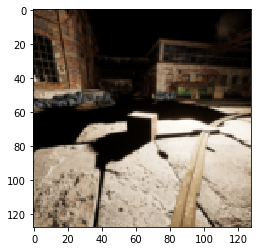

target (135°, 4500K)


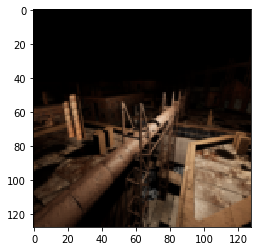

prediction input 0.1°, 4498.7K
prediction target 48.6°, 5571.4K
prediction gt 0.1°, 4498.7K
prediction gt


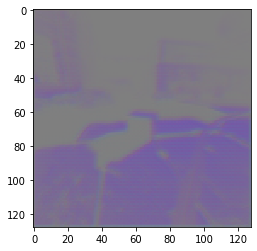

groundtruth (135°, 4500K)


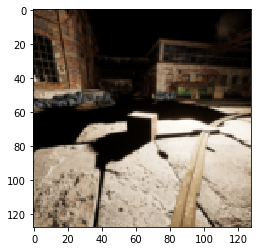

epoch [1/10], batch [101/2617], losses:0.1696, 0.0000, 0.0041, 14.4097, 0.6691, score:0.3641
epoch [1/10], batch [111/2617], losses:0.1695, 0.0000, 0.0000, 3.3476, 0.9829, score:0.2315
epoch [1/10], batch [121/2617], losses:0.1696, 0.0000, 0.0007, 17.5053, 0.9628, score:0.3995
epoch [1/10], batch [131/2617], losses:0.1696, 0.0000, 0.0020, 288.8141, 0.6852, score:0.3522
epoch [1/10], batch [141/2617], losses:0.1643, 0.0000, 0.0013, 42.8343, 0.7034, score:0.3464
epoch [1/10], batch [151/2617], losses:0.1755, 0.0000, 0.0033, 11.8307, 1.0242, score:0.3070
epoch [1/10], batch [161/2617], losses:0.1699, 0.0000, 0.0031, 44.3523, 0.8215, score:0.3217
epoch [1/10], batch [171/2617], losses:0.1641, 0.0000, 0.0007, 138.2100, 0.7978, score:0.4032
epoch [1/10], batch [181/2617], losses:0.1628, 0.0000, 0.0033, 488.1397, 0.7759, score:0.4565
epoch [1/10], batch [191/2617], losses:0.1679, 0.0000, 0.0007, 916.0305, 1.0022, score:0.3474
input (90°, 4500K)


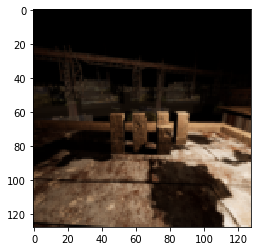

target (90°, 4500K)


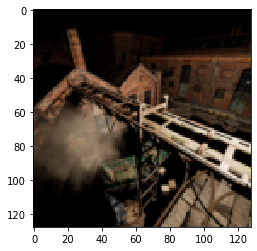

prediction input 345.9°, 4255.4K
prediction target 345.0°, 4253.4K
prediction gt 345.9°, 4255.4K
prediction gt


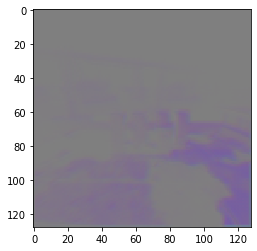

groundtruth (90°, 4500K)


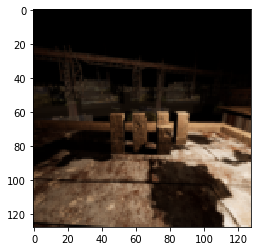

epoch [1/10], batch [201/2617], losses:0.1698, 0.0000, 0.0029, 49.0100, 0.7456, score:0.3844
epoch [1/10], batch [211/2617], losses:0.1686, 0.0000, 0.0018, 185.3403, 0.5365, score:0.3660
epoch [1/10], batch [221/2617], losses:0.1676, 0.0000, 0.0019, 105.6741, 0.4434, score:0.3513
epoch [1/10], batch [231/2617], losses:0.1695, 0.0000, 0.0017, 187.8490, 0.5684, score:0.3812
epoch [1/10], batch [241/2617], losses:0.1696, 0.0000, 0.0016, 150.7901, 0.3934, score:0.3793
epoch [1/10], batch [251/2617], losses:0.1622, 0.0000, 0.0014, 162.4923, 0.4343, score:0.3876
epoch [1/10], batch [261/2617], losses:0.1594, 0.0000, 0.0017, 153.1531, 0.5109, score:0.4317
epoch [1/10], batch [271/2617], losses:0.1695, 0.0000, 0.0020, 114.7819, 0.5411, score:0.3276
epoch [1/10], batch [281/2617], losses:0.1664, 0.0000, 0.0023, 163.2975, 0.3189, score:0.3060
epoch [1/10], batch [291/2617], losses:0.1666, 0.0000, 0.0024, 161.5938, 0.4216, score:0.3743
input (90°, 4500K)


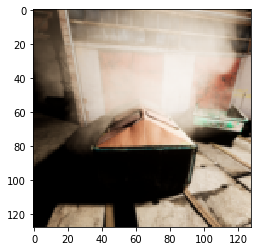

target (180°, 4500K)


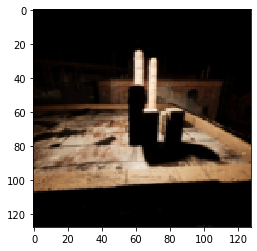

prediction input 132.0°, 5750.0K
prediction target 82.8°, 5250.3K
prediction gt 159.9°, 6032.6K
prediction gt


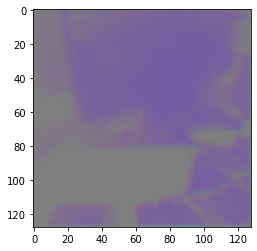

groundtruth (180°, 4500K)


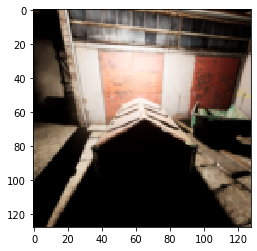

epoch [1/10], batch [301/2617], losses:0.1594, 0.0000, 0.0021, 138.6306, 0.3690, score:0.3997
epoch [1/10], batch [311/2617], losses:0.1723, 0.0000, 0.0022, 168.7097, 0.4183, score:0.2799
epoch [1/10], batch [321/2617], losses:0.1722, 0.0000, 0.0025, 129.7154, 0.3477, score:0.2911
epoch [1/10], batch [331/2617], losses:0.1669, 0.0000, 0.0018, 114.5815, 0.3348, score:0.2780
epoch [1/10], batch [341/2617], losses:0.1710, 0.0000, 0.0014, 208.5951, 0.2363, score:0.3408
epoch [1/10], batch [351/2617], losses:0.1620, 0.0000, 0.0022, 141.1755, 0.2512, score:0.3661
epoch [1/10], batch [361/2617], losses:0.1737, 0.0000, 0.0016, 213.9031, 0.2241, score:0.3498
epoch [1/10], batch [371/2617], losses:0.1667, 0.0000, 0.0017, 108.3354, 0.2397, score:0.3468
epoch [1/10], batch [381/2617], losses:0.1734, 0.0000, 0.0020, 161.8681, 0.3332, score:0.2994
epoch [1/10], batch [391/2617], losses:0.1655, 0.0000, 0.0022, 70.4592, 0.2633, score:0.3522
input (0°, 4500K)


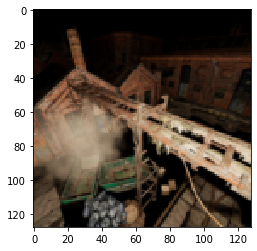

target (45°, 4500K)


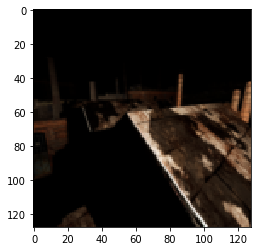

prediction input 352.1°, 4315.1K
prediction target 115.9°, 5751.4K
prediction gt 57.5°, 5082.3K
prediction gt


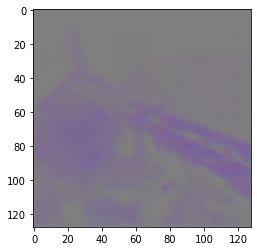

groundtruth (45°, 4500K)


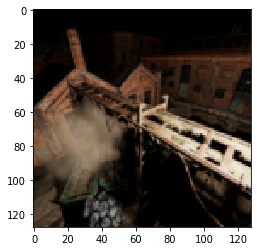

epoch [1/10], batch [401/2617], losses:0.1592, 0.0000, 0.0015, 89.0535, 0.2737, score:0.4435
epoch [1/10], batch [411/2617], losses:0.1668, 0.0000, 0.0026, 155.8061, 0.2595, score:0.3212
epoch [1/10], batch [421/2617], losses:0.1716, 0.0000, 0.0022, 94.2287, 0.2981, score:0.3425
epoch [1/10], batch [431/2617], losses:0.1628, 0.0000, 0.0016, 68.8811, 0.2552, score:0.3863
epoch [1/10], batch [441/2617], losses:0.1675, 0.0000, 0.0022, 78.9886, 0.4026, score:0.3465
epoch [1/10], batch [451/2617], losses:0.1706, 0.0000, 0.0012, 118.9003, 0.2316, score:0.2748
epoch [1/10], batch [461/2617], losses:0.1621, 0.0000, 0.0021, 93.5171, 0.1305, score:0.2886
epoch [1/10], batch [471/2617], losses:0.1661, 0.0000, 0.0013, 91.6248, 0.1895, score:0.3450
epoch [1/10], batch [481/2617], losses:0.1662, 0.0000, 0.0021, 88.5184, 0.2019, score:0.3263
epoch [1/10], batch [491/2617], losses:0.1671, 0.0000, 0.0013, 77.7337, 0.1555, score:0.3456
input (270°, 4500K)


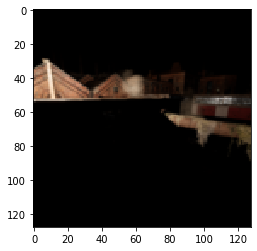

target (0°, 4500K)


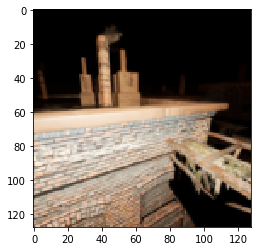

prediction input 215.8°, 7245.4K
prediction target 359.8°, 4418.9K
prediction gt 359.7°, 4419.4K
prediction gt


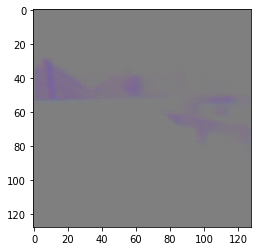

groundtruth (0°, 4500K)


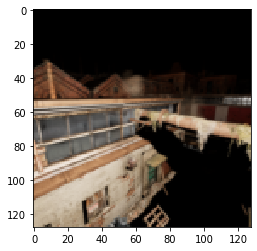

epoch [1/10], batch [501/2617], losses:0.1704, 0.0000, 0.0018, 136.4355, 0.1689, score:0.3356
epoch [1/10], batch [511/2617], losses:0.1623, 0.0000, 0.0019, 118.2861, 0.1251, score:0.4598
epoch [1/10], batch [521/2617], losses:0.1673, 0.0000, 0.0011, 93.3117, 0.1137, score:0.3391
epoch [1/10], batch [531/2617], losses:0.1755, 0.0000, 0.0021, 103.5532, 0.1291, score:0.3061
epoch [1/10], batch [541/2617], losses:0.1608, 0.0000, 0.0019, 72.5212, 0.1052, score:0.4083
epoch [1/10], batch [551/2617], losses:0.1714, 0.0000, 0.0017, 105.1384, 0.2131, score:0.3538
epoch [1/10], batch [561/2617], losses:0.1707, 0.0000, 0.0014, 87.2029, 0.1483, score:0.3035
epoch [1/10], batch [571/2617], losses:0.1667, 0.0000, 0.0015, 78.2998, 0.1354, score:0.4042
epoch [1/10], batch [581/2617], losses:0.1711, 0.0000, 0.0015, 74.0502, 0.1143, score:0.3807
epoch [1/10], batch [591/2617], losses:0.1651, 0.0000, 0.0015, 83.2795, 0.1703, score:0.3878
input (90°, 4500K)


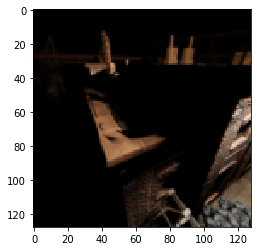

target (180°, 4500K)


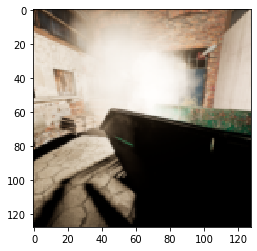

prediction input 70.9°, 5492.1K
prediction target 281.2°, 2901.5K
prediction gt 165.8°, 6907.7K
prediction gt


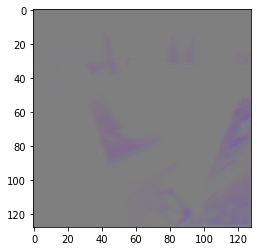

groundtruth (180°, 4500K)


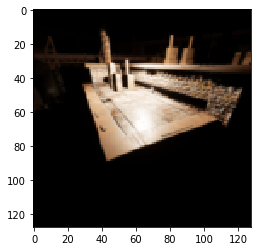

epoch [1/10], batch [601/2617], losses:0.1684, 0.0000, 0.0014, 94.1810, 0.1101, score:0.4369
epoch [1/10], batch [611/2617], losses:0.1614, 0.0000, 0.0022, 82.9815, 0.0760, score:0.4002
epoch [1/10], batch [621/2617], losses:0.1655, 0.0000, 0.0019, 77.8496, 0.1291, score:0.3914
epoch [1/10], batch [631/2617], losses:0.1682, 0.0000, 0.0023, 101.8542, 0.0598, score:0.4060
epoch [1/10], batch [641/2617], losses:0.1675, 0.0000, 0.0017, 87.8990, 0.1002, score:0.4052
epoch [1/10], batch [651/2617], losses:0.1604, 0.0000, 0.0022, 66.0820, 0.0997, score:0.3778
epoch [1/10], batch [661/2617], losses:0.1680, 0.0000, 0.0019, 50.9348, 0.0769, score:0.3363
epoch [1/10], batch [671/2617], losses:0.1596, 0.0000, 0.0018, 82.9443, 0.1119, score:0.3928
epoch [1/10], batch [681/2617], losses:0.1656, 0.0000, 0.0024, 52.0963, 0.0796, score:0.3491
epoch [1/10], batch [691/2617], losses:0.1691, 0.0000, 0.0011, 52.6413, 0.0430, score:0.2804
input (90°, 4500K)


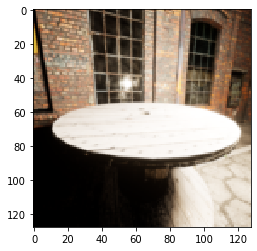

target (315°, 4500K)


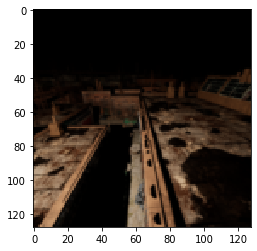

prediction input 62.6°, 5521.1K
prediction target 329.8°, 3704.7K
prediction gt 331.7°, 3744.8K
prediction gt


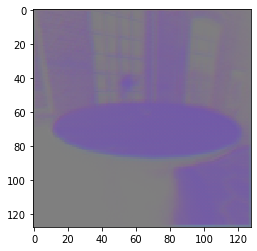

groundtruth (315°, 4500K)


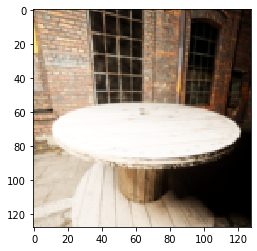

epoch [1/10], batch [701/2617], losses:0.1707, 0.0000, 0.0018, 68.6622, 0.0410, score:0.3143
epoch [1/10], batch [711/2617], losses:0.1633, 0.0000, 0.0020, 54.8942, 0.0643, score:0.3515
epoch [1/10], batch [721/2617], losses:0.1644, 0.0000, 0.0017, 69.3481, 0.0152, score:0.3808
epoch [1/10], batch [731/2617], losses:0.1663, 0.0000, 0.0011, 58.2577, 0.0209, score:0.3560
epoch [1/10], batch [741/2617], losses:0.1659, 0.0000, 0.0015, 55.8399, 0.0363, score:0.4303
epoch [1/10], batch [751/2617], losses:0.1679, 0.0000, 0.0014, 55.2332, 0.0276, score:0.2796
epoch [1/10], batch [761/2617], losses:0.1656, 0.0000, 0.0017, 55.8742, 0.0169, score:0.3851
epoch [1/10], batch [771/2617], losses:0.1623, 0.0000, 0.0018, 35.8252, 0.0218, score:0.3549
epoch [1/10], batch [781/2617], losses:0.1706, 0.0000, 0.0013, 46.0927, 0.0082, score:0.3267
epoch [1/10], batch [791/2617], losses:0.1662, 0.0000, 0.0014, 40.5260, 0.0138, score:0.3271
input (315°, 4500K)


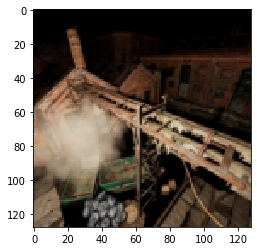

target (0°, 4500K)


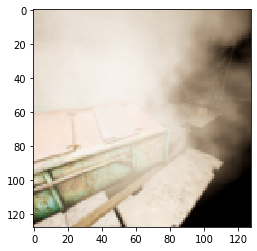

prediction input 346.2°, 4014.3K
prediction target 359.8°, 4433.8K
prediction gt 0.0°, 4444.2K
prediction gt


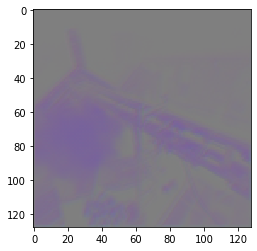

groundtruth (0°, 4500K)


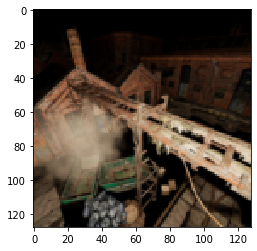

epoch [1/10], batch [801/2617], losses:0.1700, 0.0000, 0.0009, 58.4342, 0.0134, score:0.3602
epoch [1/10], batch [811/2617], losses:0.1696, 0.0000, 0.0009, 36.3552, 0.0166, score:0.2552
epoch [1/10], batch [821/2617], losses:0.1664, 0.0000, 0.0011, 39.3223, 0.0102, score:0.3023
epoch [1/10], batch [831/2617], losses:0.1687, 0.0000, 0.0021, 46.0860, 0.0150, score:0.3848
epoch [1/10], batch [841/2617], losses:0.1701, 0.0000, 0.0014, 37.0473, 0.0035, score:0.3526
epoch [1/10], batch [851/2617], losses:0.1649, 0.0000, 0.0009, 33.9438, 0.0109, score:0.3788
epoch [1/10], batch [861/2617], losses:0.1669, 0.0000, 0.0013, 35.9501, 0.0088, score:0.3759
epoch [1/10], batch [871/2617], losses:0.1713, 0.0000, 0.0016, 45.3998, 0.0077, score:0.3148
epoch [1/10], batch [881/2617], losses:0.1706, 0.0000, 0.0016, 37.1447, 0.0179, score:0.3344
epoch [1/10], batch [891/2617], losses:0.1648, 0.0000, 0.0011, 26.2378, 0.0065, score:0.3533
input (180°, 4500K)


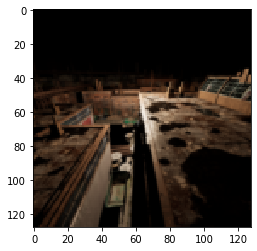

target (270°, 4500K)


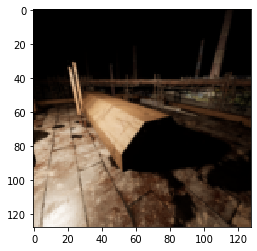

prediction input 82.4°, 6395.2K
prediction target 336.7°, 3505.8K
prediction gt 337.9°, 3554.7K
prediction gt


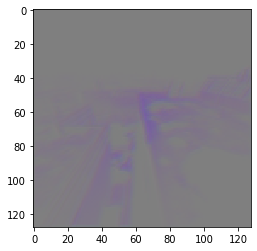

groundtruth (270°, 4500K)


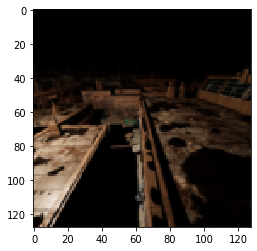

epoch [1/10], batch [901/2617], losses:0.1722, 0.0000, 0.0016, 33.9811, 0.0085, score:0.3846
epoch [1/10], batch [911/2617], losses:0.1682, 0.0000, 0.0014, 35.2126, 0.0101, score:0.3656
epoch [1/10], batch [921/2617], losses:0.1702, 0.0000, 0.0011, 24.3560, 0.0036, score:0.2465
epoch [1/10], batch [931/2617], losses:0.1700, 0.0000, 0.0011, 36.2895, 0.0066, score:0.3210
epoch [1/10], batch [941/2617], losses:0.1712, 0.0000, 0.0012, 18.8271, 0.0135, score:0.2827
epoch [1/10], batch [951/2617], losses:0.1675, 0.0000, 0.0014, 21.5506, 0.0086, score:0.3942
epoch [1/10], batch [961/2617], losses:0.1621, 0.0000, 0.0015, 22.4116, 0.0091, score:0.4157
epoch [1/10], batch [971/2617], losses:0.1755, 0.0000, 0.0009, 23.7546, 0.0022, score:0.3290
epoch [1/10], batch [981/2617], losses:0.1712, 0.0000, 0.0013, 25.4694, 0.0017, score:0.3713
epoch [1/10], batch [991/2617], losses:0.1611, 0.0000, 0.0011, 21.0878, 0.0048, score:0.3778
input (90°, 4500K)


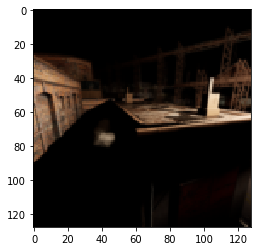

target (0°, 4500K)


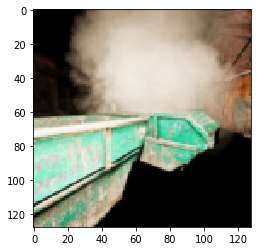

prediction input 33.2°, 5391.5K
prediction target 360.0°, 4457.8K
prediction gt 2.7°, 4535.4K
prediction gt


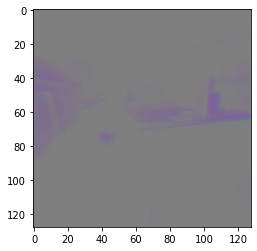

groundtruth (0°, 4500K)


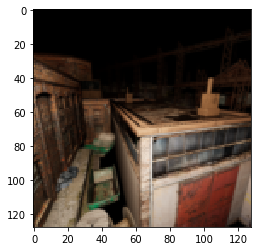

epoch [1/10], batch [1001/2617], losses:0.1677, 0.0000, 0.0017, 19.9977, 0.0061, score:0.3059
epoch [1/10], batch [1011/2617], losses:0.1622, 0.0000, 0.0019, 23.3031, 0.0048, score:0.3778
epoch [1/10], batch [1021/2617], losses:0.1635, 0.0000, 0.0010, 19.6829, 0.0047, score:0.4173


KeyboardInterrupt: 

In [8]:
def angle(angle1, angle2):
    # https://discuss.pytorch.org/t/custom-loss-function-for-discontinuous-angle-calculation/58579
    return torch.mean(1. - torch.cos((angle1 - angle2)/180.*3.14))
    

def train(epoch):
    print('------------- training --------------- epoch:', epoch+1)
    epoch_loss = 0
    for i,data in enumerate(train_dataloader):
        inp, out = data
        img1 = inp[0]['image'].cuda()
        img2 = inp[1]['image'].cuda()
        groundtruth = out['image'].cuda()
        # ===================forward=====================
        scene_gt, scene_img1, scene_img2,\
        illumination_gt, illumination_img1, illumination_img2,\
        ill_pred_gt, ill_pred_img1, ill_pred_img2,\
        prediction = model(img1, img2, groundtruth)        
        loss1 = 1.    *distance(prediction, groundtruth) 
        loss2 = .01   *distance(F.normalize(scene_gt), F.normalize(scene_img1))
        loss3 = .01   *distance(F.normalize(illumination_gt), F.normalize(illumination_img2))
        loss4 = .0001 *distance(4500.+2000.*ill_pred_gt[:,0,0,0], (1.*out['color']).cuda())
        loss5 = 1.  *angle(180.*ill_pred_gt[:,1,0,0], (1.*out['direction']).cuda())
        #print(loss1, loss2, loss3, loss4, loss5)
        #loss = loss1 + loss2 + loss3 + loss4 + loss5
        loss = loss5
        loss_history1.append(loss1.item())
        loss_history5.append(loss5.item())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        # ===================log========================
        epoch_loss += 1000*loss.data
        if i%100==0: 
            print("input ({}°, {}K)".format(inp[0]['direction'][0].item(), inp[0]['color'][0].item()))
            implotin = plt.imshow(inp[0]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("target ({}°, {}K)".format(inp[1]['direction'][0].item(), inp[1]['color'][0].item()))
            implotin2 = plt.imshow(inp[1]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction input {:.1f}°, {:.1f}K".format(180.*ill_pred_img1[0,0,0,0].item()%360, 4500.+2000.*ill_pred_img1[0,1,0,0].item()))
            print("prediction target {:.1f}°, {:.1f}K".format(180.*ill_pred_img2[0,0,0,0].item()%360, 4500.+2000.*ill_pred_img2[0,1,0,0].item()))
            print("prediction gt {:.1f}°, {:.1f}K".format(180.*ill_pred_gt[0,0,0,0].item()%360, 4500.+2000.*ill_pred_gt[0,1,0,0].item()))
            print("prediction gt")
            implotpred = plt.imshow(prediction.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("groundtruth ({}°, {}K)".format(out['direction'][0].item(), out['color'][0].item()))
            implotgt = plt.imshow(groundtruth.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
        if i%10==0: 
            score = distance(inp[0]['image'].cuda(), groundtruth).data / loss1.data #how well I did compared to output=input
            print('epoch [{}/{}], batch [{}/{}], losses:{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, score:{:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), loss1.data, loss2.data, loss3.data, loss4.data, loss5.data, score))


for epoch in range(num_epochs):
    train(epoch)
    if epoch%1 == 0:
        PATH = './Experiment2-Swap-Resize128-NtoN'+str(epoch)+'.pth'
        torch.save(model.state_dict(), PATH)
        
        
        
print('Finished Training')

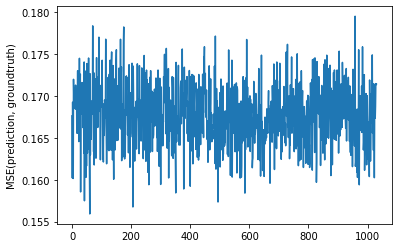

In [9]:
plt.plot(loss_history1)
plt.ylabel('MSE(prediction, groundtruth)')
plt.show()

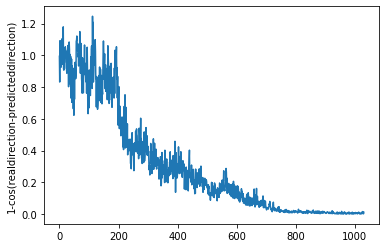

In [10]:
plt.plot(loss_history5)
plt.ylabel('1-cos(realdirection-predicteddirection)')
plt.show()

In [11]:
PATH = './Experiment2-Swap-Resize128-NtoN-Step1.pth'
torch.save(model.state_dict(), PATH)

optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5) 

In [21]:
model = SwapModel().cuda()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5) #Weight Decay is L2 Regularization
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint)

<All keys matched successfully>

------------- training --------------- epoch: 1
input (270°, 4500K)


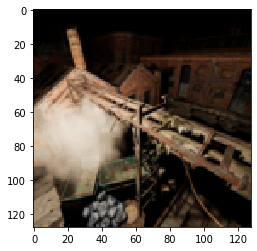

target (180°, 4500K)


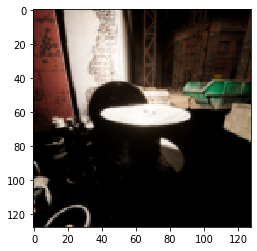

prediction input 343.6°, 3476.2K
prediction target 70.3°, 6533.8K
prediction gt 69.6°, 6512.0K
prediction gt


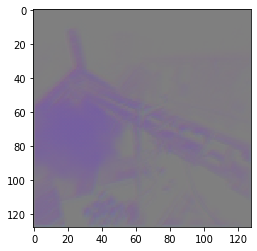

groundtruth (180°, 4500K)


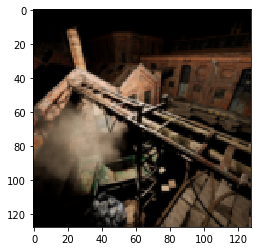

epoch [1/10], batch [1/2617], losses:0.1611, 0.0000, 0.0020, 18.1595, 0.0046, score:0.3796
epoch [1/10], batch [11/2617], losses:0.1331, 0.0000, 0.0018, 10.3680, 0.2774, score:0.3985
epoch [1/10], batch [21/2617], losses:0.0831, 0.0000, 0.0026, 10.7408, 0.4720, score:0.7846
epoch [1/10], batch [31/2617], losses:0.0634, 0.0000, 0.0021, 15.5840, 0.2458, score:0.9152
epoch [1/10], batch [41/2617], losses:0.0592, 0.0000, 0.0016, 9.0826, 0.1852, score:1.0083
epoch [1/10], batch [51/2617], losses:0.0542, 0.0000, 0.0016, 12.0963, 0.1581, score:1.2502
epoch [1/10], batch [61/2617], losses:0.0497, 0.0000, 0.0016, 8.5094, 0.1890, score:1.1248
epoch [1/10], batch [71/2617], losses:0.0482, 0.0000, 0.0017, 5.0700, 0.0870, score:1.2423
epoch [1/10], batch [81/2617], losses:0.0447, 0.0000, 0.0011, 6.5364, 0.1319, score:1.2783
epoch [1/10], batch [91/2617], losses:0.0355, 0.0000, 0.0012, 5.4025, 0.1433, score:1.3862
input (90°, 4500K)


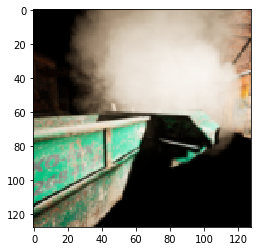

target (45°, 4500K)


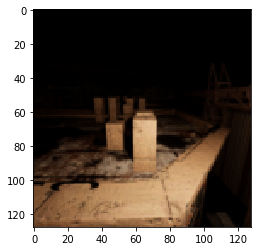

prediction input 17.1°, 5252.9K
prediction target 13.0°, 5066.5K
prediction gt 10.5°, 4949.0K
prediction gt


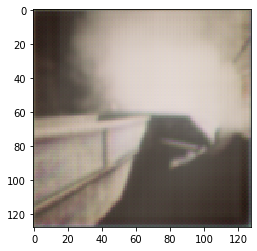

groundtruth (45°, 4500K)


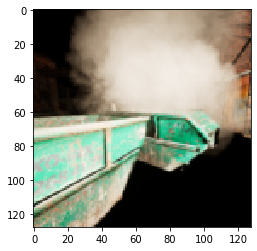

epoch [1/10], batch [101/2617], losses:0.0510, 0.0000, 0.0016, 9.1402, 0.0906, score:1.3918
epoch [1/10], batch [111/2617], losses:0.0385, 0.0000, 0.0019, 8.0079, 0.1102, score:1.4805
epoch [1/10], batch [121/2617], losses:0.0402, 0.0000, 0.0019, 5.9022, 0.0864, score:1.5336
epoch [1/10], batch [131/2617], losses:0.0395, 0.0000, 0.0018, 3.4772, 0.1194, score:1.7344
epoch [1/10], batch [141/2617], losses:0.0392, 0.0000, 0.0013, 3.1545, 0.1118, score:1.4082
epoch [1/10], batch [151/2617], losses:0.0426, 0.0000, 0.0014, 2.3239, 0.1548, score:1.4168
epoch [1/10], batch [161/2617], losses:0.0360, 0.0000, 0.0011, 2.6636, 0.0807, score:1.4842
epoch [1/10], batch [171/2617], losses:0.0401, 0.0000, 0.0018, 4.3282, 0.2857, score:1.5455
epoch [1/10], batch [181/2617], losses:0.0485, 0.0000, 0.0011, 2.0916, 0.1466, score:1.4893
epoch [1/10], batch [191/2617], losses:0.0420, 0.0000, 0.0014, 2.8555, 0.0706, score:1.5519
input (225°, 4500K)


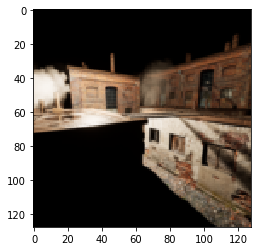

target (315°, 4500K)


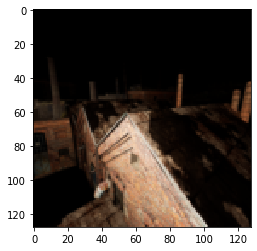

prediction input 32.3°, 7062.5K
prediction target 360.0°, 4444.4K
prediction gt 360.0°, 4390.7K
prediction gt


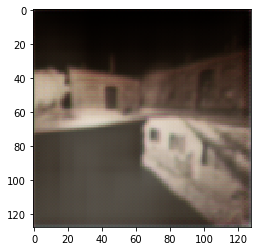

groundtruth (315°, 4500K)


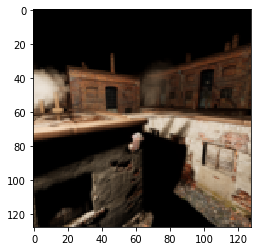

epoch [1/10], batch [201/2617], losses:0.0395, 0.0000, 0.0007, 2.0648, 0.0688, score:1.5731
epoch [1/10], batch [211/2617], losses:0.0316, 0.0000, 0.0018, 1.8098, 0.1109, score:1.6817
epoch [1/10], batch [221/2617], losses:0.0424, 0.0000, 0.0020, 2.7226, 0.1765, score:1.6911
epoch [1/10], batch [231/2617], losses:0.0397, 0.0000, 0.0021, 1.9171, 0.1392, score:1.4982
epoch [1/10], batch [241/2617], losses:0.0319, 0.0000, 0.0013, 1.8868, 0.0805, score:1.9697
epoch [1/10], batch [251/2617], losses:0.0339, 0.0000, 0.0017, 1.9008, 0.0955, score:1.6355
epoch [1/10], batch [261/2617], losses:0.0342, 0.0000, 0.0018, 1.1620, 0.0918, score:1.7114
epoch [1/10], batch [271/2617], losses:0.0416, 0.0000, 0.0019, 0.9657, 0.0638, score:1.6217
epoch [1/10], batch [281/2617], losses:0.0311, 0.0000, 0.0022, 0.9159, 0.0846, score:1.6086
epoch [1/10], batch [291/2617], losses:0.0366, 0.0000, 0.0017, 0.6832, 0.1349, score:1.7214
input (45°, 4500K)


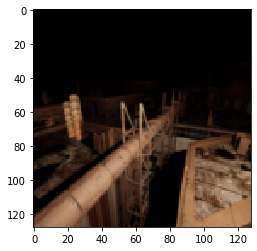

target (45°, 4500K)


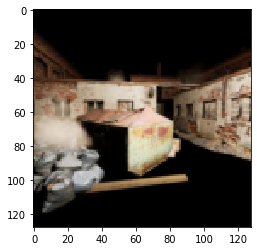

prediction input 3.5°, 5039.4K
prediction target 0.8°, 4601.2K
prediction gt 3.5°, 5039.4K
prediction gt


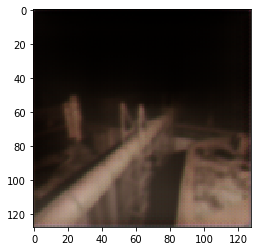

groundtruth (45°, 4500K)


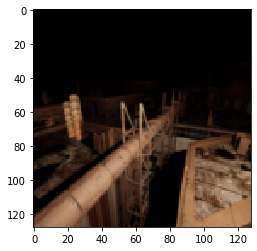

epoch [1/10], batch [301/2617], losses:0.0297, 0.0000, 0.0013, 0.3255, 0.0686, score:1.7324
epoch [1/10], batch [311/2617], losses:0.0343, 0.0000, 0.0017, 0.6004, 0.0850, score:1.7470
epoch [1/10], batch [321/2617], losses:0.0443, 0.0000, 0.0021, 0.3910, 0.1269, score:1.5754
epoch [1/10], batch [331/2617], losses:0.0366, 0.0000, 0.0025, 0.3134, 0.1645, score:1.7528
epoch [1/10], batch [341/2617], losses:0.0392, 0.0000, 0.0022, 0.3073, 0.2146, score:1.5752
epoch [1/10], batch [351/2617], losses:0.0361, 0.0000, 0.0021, 0.2257, 0.1246, score:1.5897
epoch [1/10], batch [361/2617], losses:0.0310, 0.0000, 0.0017, 0.1384, 0.1554, score:1.6126
epoch [1/10], batch [371/2617], losses:0.0373, 0.0000, 0.0018, 0.1621, 0.1495, score:1.6092
epoch [1/10], batch [381/2617], losses:0.0366, 0.0000, 0.0017, 0.0858, 0.1506, score:1.6465
epoch [1/10], batch [391/2617], losses:0.0284, 0.0000, 0.0016, 0.1436, 0.1641, score:1.6926
input (180°, 4500K)


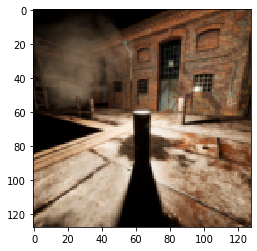

target (135°, 4500K)


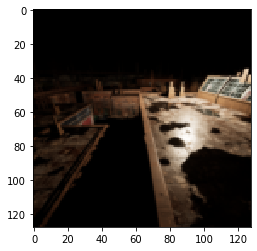

prediction input 359.7°, 2866.8K
prediction target 3.7°, 5800.5K
prediction gt 4.4°, 6051.9K
prediction gt


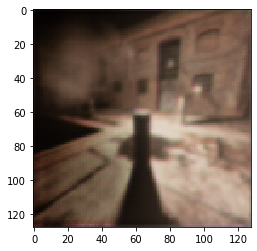

groundtruth (135°, 4500K)


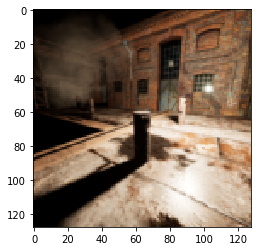

epoch [1/10], batch [401/2617], losses:0.0322, 0.0000, 0.0022, 0.0793, 0.0562, score:1.7407
epoch [1/10], batch [411/2617], losses:0.0266, 0.0000, 0.0025, 0.0731, 0.1273, score:2.0509
epoch [1/10], batch [421/2617], losses:0.0333, 0.0000, 0.0020, 0.0538, 0.0635, score:1.7911
epoch [1/10], batch [431/2617], losses:0.0491, 0.0000, 0.0024, 0.0745, 0.3848, score:1.2780
epoch [1/10], batch [441/2617], losses:0.0632, 0.0000, 0.0021, 0.0168, 0.8154, score:1.0829
epoch [1/10], batch [451/2617], losses:0.0573, 0.0000, 0.0023, 13.0908, 1.3269, score:1.0995
epoch [1/10], batch [461/2617], losses:0.0525, 0.0000, 0.0024, 0.0065, 0.9921, score:1.0469
epoch [1/10], batch [471/2617], losses:0.1320, 0.0000, 0.0000, 1065239183360.0000, 0.9597, score:0.3934
epoch [1/10], batch [481/2617], losses:0.1434, 0.0000, 0.0000, 1157788672.0000, 0.8223, score:0.4354
epoch [1/10], batch [491/2617], losses:0.0820, 0.0000, 0.0000, 992469.5625, 0.8938, score:0.8239
input (270°, 4500K)


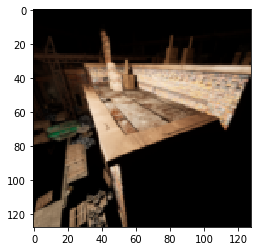

target (180°, 4500K)


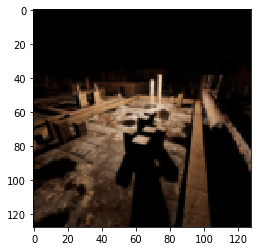

prediction input 159.9°, 5738734.4K
prediction target 111.0°, 4574906.7K
prediction gt 82.7°, 5567753.4K
prediction gt


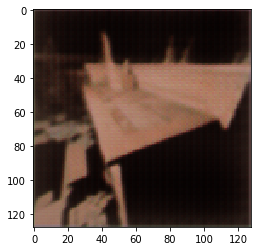

groundtruth (180°, 4500K)


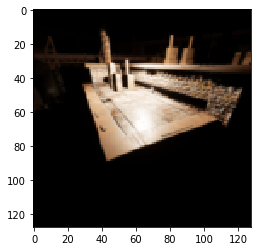

epoch [1/10], batch [501/2617], losses:0.0566, 0.0000, 0.0000, 101722.7266, 0.9475, score:1.0195
epoch [1/10], batch [511/2617], losses:0.0506, 0.0000, 0.0000, 336.4530, 1.1515, score:1.0543
epoch [1/10], batch [521/2617], losses:0.0409, 0.0000, 0.0000, 0.3766, 0.9291, score:1.1996
epoch [1/10], batch [531/2617], losses:0.0468, 0.0000, 0.0000, 0.1682, 1.0391, score:1.3436
epoch [1/10], batch [541/2617], losses:0.0442, 0.0000, 0.0000, 0.1246, 1.1981, score:1.1845
epoch [1/10], batch [551/2617], losses:0.0484, 0.0000, 0.0000, 0.1750, 0.9089, score:1.2538
epoch [1/10], batch [561/2617], losses:0.0416, 0.0000, 0.0000, 0.1404, 1.0121, score:1.2223
epoch [1/10], batch [571/2617], losses:0.0438, 0.0000, 0.0000, 0.2428, 0.9761, score:1.1824
epoch [1/10], batch [581/2617], losses:0.0429, 0.0000, 0.0000, 0.2068, 0.9365, score:1.3779
epoch [1/10], batch [591/2617], losses:0.0507, 0.0000, 0.0000, 0.1399, 0.8983, score:1.3134
input (135°, 4500K)


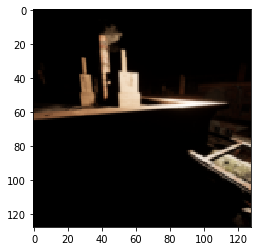

target (225°, 4500K)


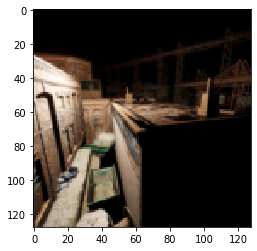

prediction input 356.9°, -700614.0K
prediction target 356.9°, -730857.9K
prediction gt 356.8°, -727306.8K
prediction gt


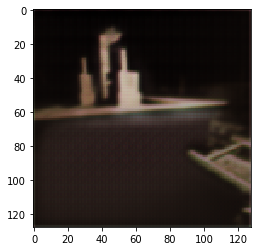

groundtruth (225°, 4500K)


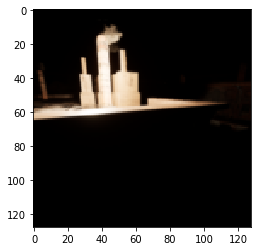

epoch [1/10], batch [601/2617], losses:0.0387, 0.0000, 0.0000, 0.1151, 1.0499, score:1.1811
epoch [1/10], batch [611/2617], losses:0.0464, 0.0000, 0.0000, 0.1012, 0.9133, score:1.2919
epoch [1/10], batch [621/2617], losses:0.0469, 0.0000, 0.0000, 0.0675, 0.9205, score:1.2745
epoch [1/10], batch [631/2617], losses:0.0490, 0.0000, 0.0000, 0.0666, 0.9460, score:1.2896
epoch [1/10], batch [641/2617], losses:0.0521, 0.0000, 0.0000, 0.0765, 1.0918, score:1.3753


KeyboardInterrupt: 

In [22]:
def angle(angle1, angle2):
    # https://discuss.pytorch.org/t/custom-loss-function-for-discontinuous-angle-calculation/58579
    return torch.mean(1. - torch.cos((angle1 - angle2)/180.*3.14))
    

def train(epoch):
    print('------------- training --------------- epoch:', epoch+1)
    epoch_loss = 0
    for i,data in enumerate(train_dataloader):
        inp, out = data
        img1 = inp[0]['image'].cuda()
        img2 = inp[1]['image'].cuda()
        groundtruth = out['image'].cuda()
        # ===================forward=====================
        scene_gt, scene_img1, scene_img2,\
        illumination_gt, illumination_img1, illumination_img2,\
        ill_pred_gt, ill_pred_img1, ill_pred_img2,\
        prediction = model(img1, img2, groundtruth)        
        loss1 = 1.    *distance(prediction, groundtruth) 
        loss2 = .01   *distance(F.normalize(scene_gt), F.normalize(scene_img1))
        loss3 = .01   *distance(F.normalize(illumination_gt), F.normalize(illumination_img2))
        loss4 = .0001 *distance(4500.+2000.*ill_pred_gt[:,0,0,0], (1.*out['color']).cuda())
        loss5 = 1.  *angle(180.*ill_pred_gt[:,1,0,0], (1.*out['direction']).cuda())
        #print(loss1, loss2, loss3, loss4, loss5)
        #loss = loss1 + loss2 + loss3 + loss4 + loss5
        loss = loss1 + loss5
        loss_history1.append(loss1)
        loss_history5.append(loss5)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        # ===================log========================
        epoch_loss += 1000*loss.data
        if i%100==0: 
            print("input ({}°, {}K)".format(inp[0]['direction'][0].item(), inp[0]['color'][0].item()))
            implotin = plt.imshow(inp[0]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("target ({}°, {}K)".format(inp[1]['direction'][0].item(), inp[1]['color'][0].item()))
            implotin2 = plt.imshow(inp[1]['image'].detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("prediction input {:.1f}°, {:.1f}K".format(180.*ill_pred_img1[0,0,0,0].item()%360, 4500.+2000.*ill_pred_img1[0,1,0,0].item()))
            print("prediction target {:.1f}°, {:.1f}K".format(180.*ill_pred_img2[0,0,0,0].item()%360, 4500.+2000.*ill_pred_img2[0,1,0,0].item()))
            print("prediction gt {:.1f}°, {:.1f}K".format(180.*ill_pred_gt[0,0,0,0].item()%360, 4500.+2000.*ill_pred_gt[0,1,0,0].item()))
            print("prediction gt")
            implotpred = plt.imshow(prediction.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
            print("groundtruth ({}°, {}K)".format(out['direction'][0].item(), out['color'][0].item()))
            implotgt = plt.imshow(groundtruth.cpu().detach().permute(2,3,1,0).numpy()[:,:,:,0], vmin=0, vmax=1)
            plt.show()
        if i%10==0: 
            score = distance(inp[0]['image'].cuda(), groundtruth).data / loss1.data #how well I did compared to output=input
            print('epoch [{}/{}], batch [{}/{}], losses:{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, score:{:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), loss1.data, loss2.data, loss3.data, loss4.data, loss5.data, score))


for epoch in range(num_epochs):
    train(epoch)
    if epoch%1 == 0:
        PATH = './Experiment2-Swap-Resize128-NtoN'+str(epoch)+'.pth'
        torch.save(model.state_dict(), PATH)
        
        
        
print('Finished Training')

In [23]:
PATH = './Experiment2-Swap-Resize128-NtoN-Step2.pth'
torch.save(model.state_dict(), PATH)

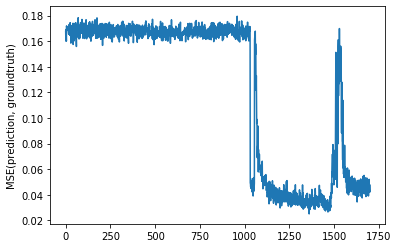

In [42]:
#the strange things in the middle (~1050) should not be there, it is my fault
plt.plot(loss_history1[:1031]+loss_history1[1091:])
plt.ylabel('MSE(prediction, groundtruth)')
plt.show()

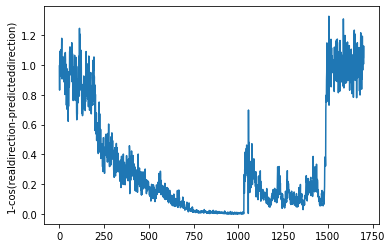

In [41]:
#the strange things in the middle (~1050) should not be there, it is my fault
plt.plot(loss_history5[:1031]+loss_history5[1091:])
plt.ylabel('1-cos(realdirection-predicteddirection)')
plt.show()